### Comparing metrics of models

In [2]:
import pandas as pd
import os
import glob
import numpy as np
from summary import metric, vismetric, viserror

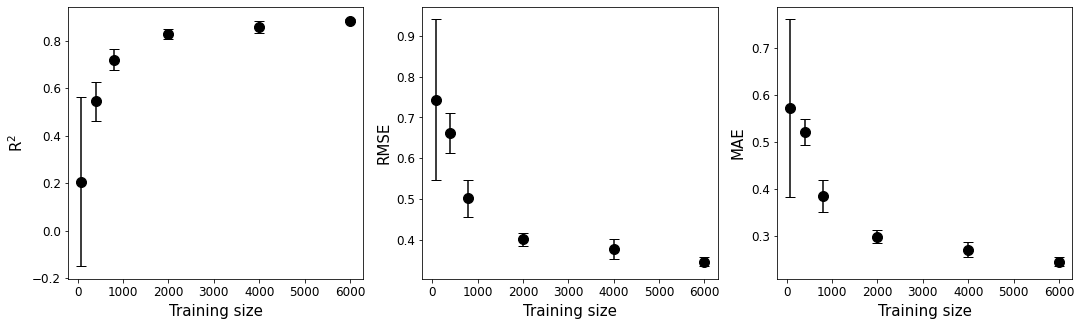

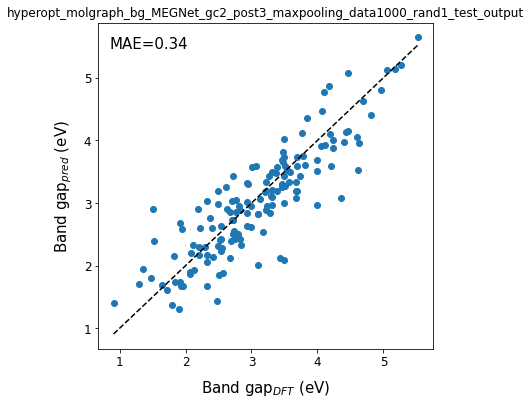

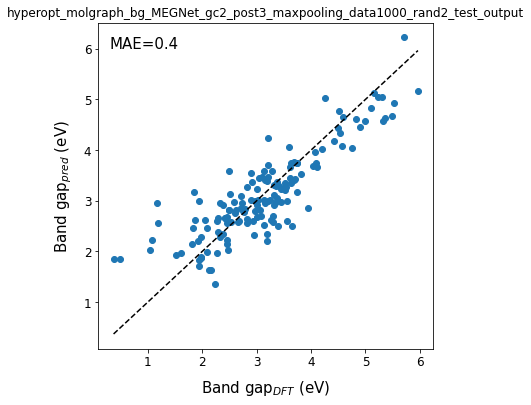

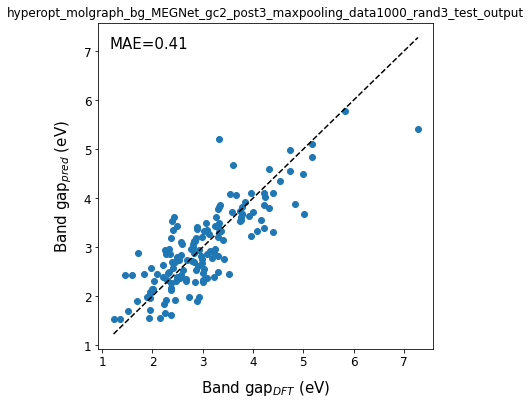

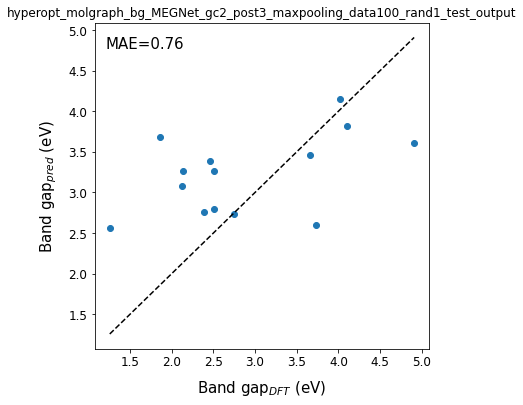

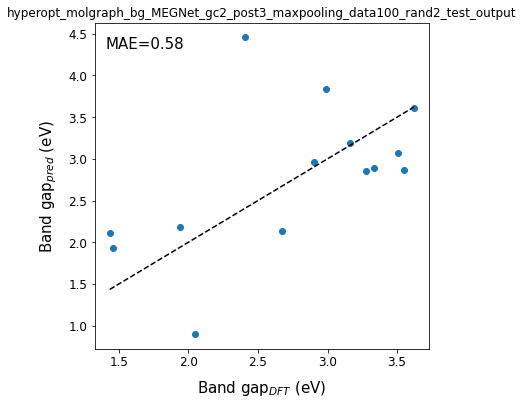

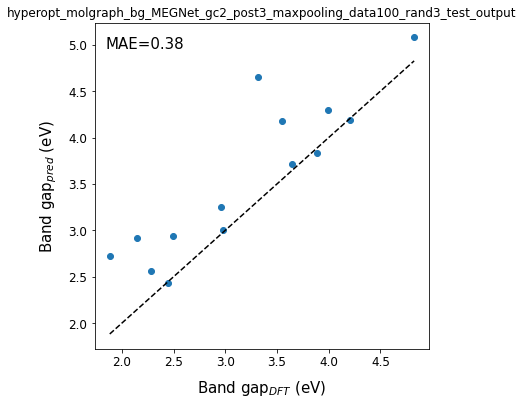

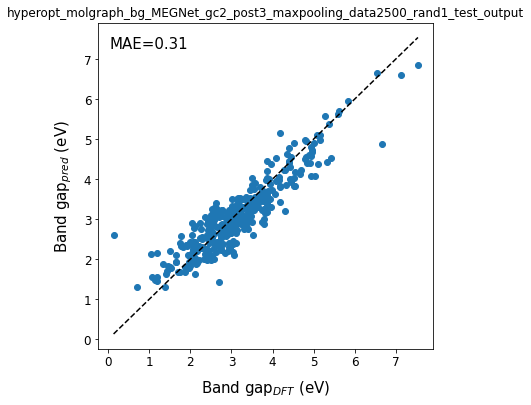

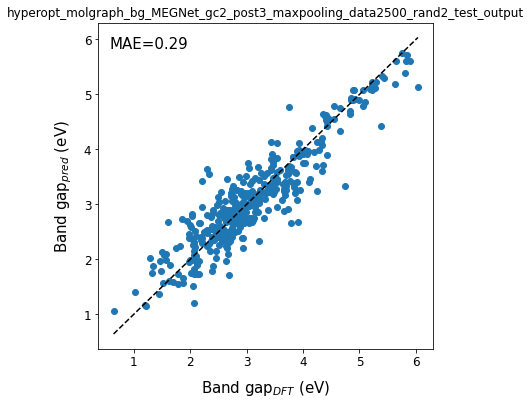

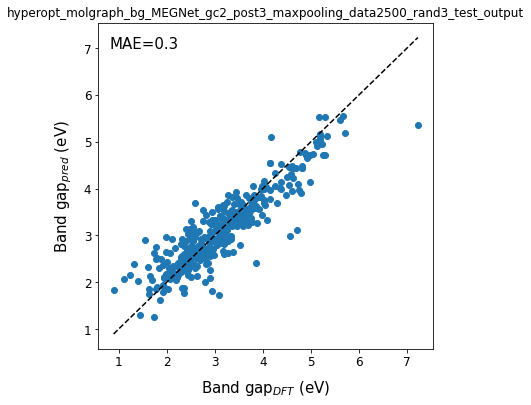

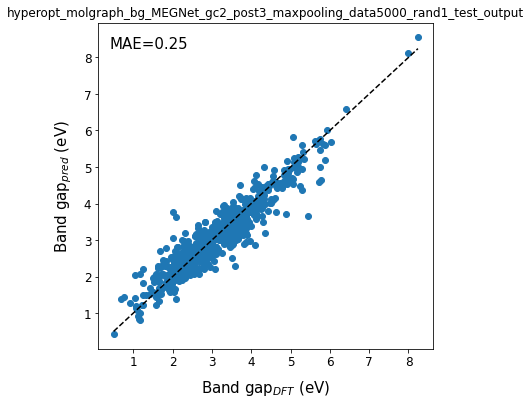

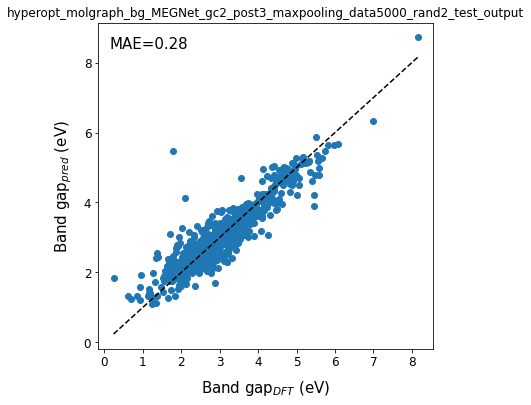

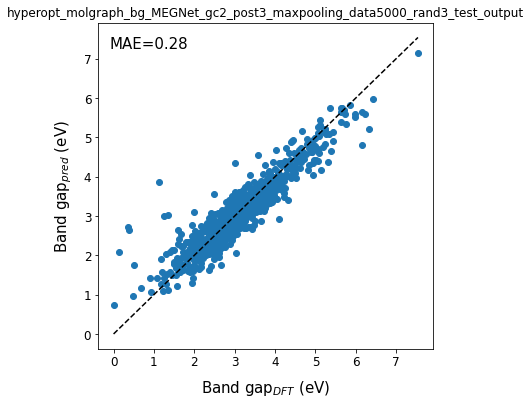

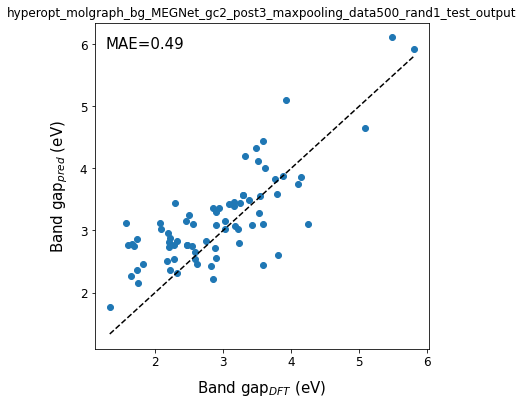

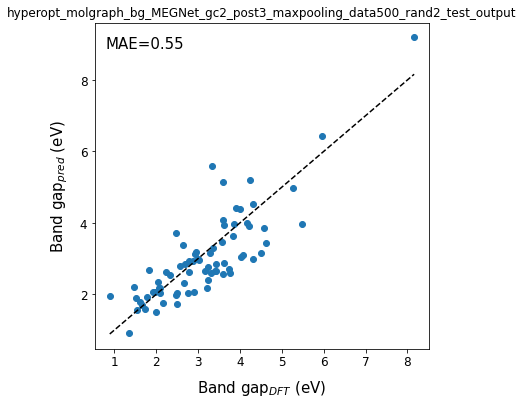

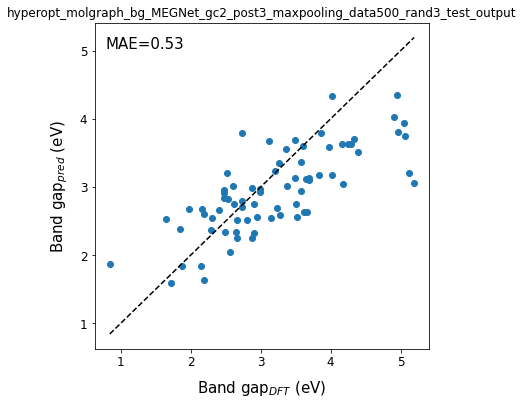

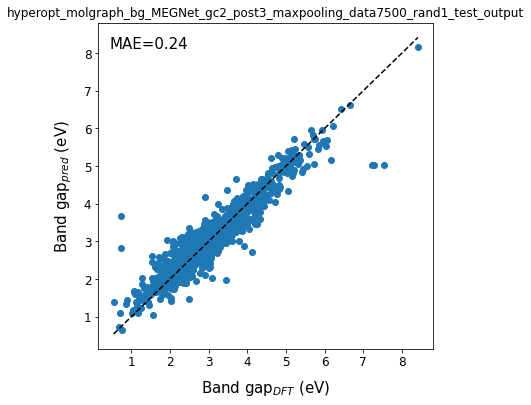

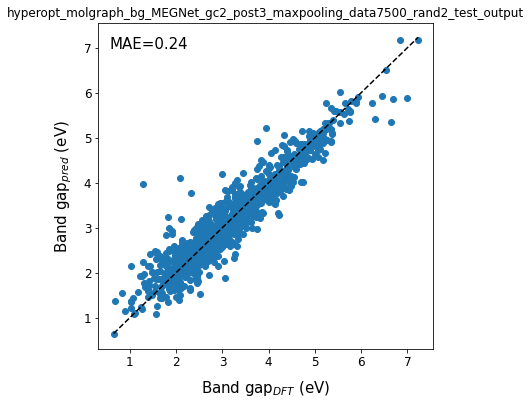

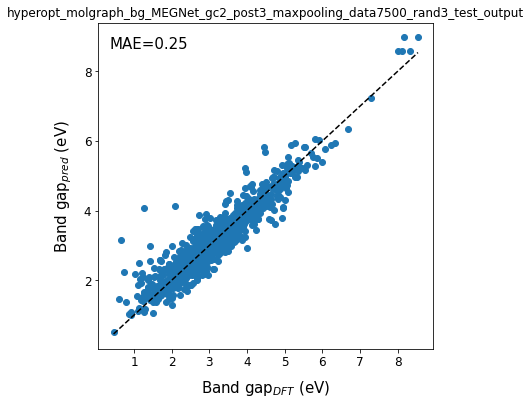

In [3]:
# Pathの設定
###--------------------------
ftype = "hyperopt_molgraph" # crystgraph, molgraph
target = "bg"       # bg, mp
model = "MEGNet"     # CGCNN, SchNet, MEGNet
gc = 2              # 1,2,3,4
post = 3            # Fix
pooling = "max"    # mean, add, max, set2set
base_path = "D:datasets/orgcrystmp_data_nodisorder/results/Bandgap/"
# base_path = "../MatDeepLearn_test/"
###-------------------------
filename = ftype+"_"+target+"_"+model+"_gc"+str(gc)+"_post"+str(post)+"_"+pooling+"pooling"
path = base_path + filename+"*.csv"
fig_path = base_path+"figures/"


# Pathフォルダ内にある.csvファイルの名前をすべて取得
file_list = glob.glob(path, recursive=True)

metric_list_train=[]
metric_list_val=[]
metric_list_test=[]

# Calculate metrics
for file in file_list:
    if "train" in file:
        metric_list_train.append(metric(file))
        df_train = pd.DataFrame(metric_list_train, columns=["size", "r2", "rmse", "mae"])
    if "val" in file:
        metric_list_val.append(metric(file))
        df_val = pd.DataFrame(metric_list_val, columns=["size", "r2", "rmse", "mae"])
    if "test" in file:
        metric_list_test.append(metric(file))
        df_test = pd.DataFrame(metric_list_test, columns=["size", "r2", "rmse", "mae"])

# datasizeの計算
size_train = np.array([i[0] for i in metric_list_train])
size_val = np.array([i[0] for i in metric_list_val])
size_test = np.array([i[0] for i in metric_list_test])
# datasize = size_train+size_val+size_test

# Summarize data with same size
df_test_r2 = df_test.groupby('size')['r2'].agg(r2_mean=np.mean, r2_std=lambda x: np.std(x, ddof = 1)).reset_index()
df_test_rmse = df_test.groupby('size')['rmse'].agg(rmse_mean=np.mean, rmse_std=lambda x: np.std(x, ddof = 1)).reset_index()
df_test_mae = df_test.groupby('size')['mae'].agg(mae_mean=np.mean, mae_std=lambda x: np.std(x, ddof = 1)).reset_index()
df_test_result = pd.concat([df_test_r2, df_test_rmse, df_test_mae], axis=1)

# Check calculated metrics
df_train_size = df_train.groupby('size')['r2'].agg(r2_mean=np.mean).reset_index()
# print("Train:------------")
# print(df_train_size)
# print("Test:------------")
# print(df_test_result)

# Visualize metrics
vismetric(df_train_size["size"],
          df_test_result["r2_mean"], df_test_result["r2_std"],
          df_test_result["rmse_mean"], df_test_result["rmse_std"],
          df_test_result["mae_mean"], df_test_result["mae_std"],
          save=True, save_path=fig_path,
          filename="Metrics_"+filename+".png")
df_test_result.to_csv(fig_path+"Metrics_"+filename+".csv")

# # Visualize error plot
for file in file_list:
    if "test" in file:
        viserror(file_fullpath=file, save=True,
                save_path=fig_path)

In [4]:
df_test_result

,size,r2_mean,r2_std,size,rmse_mean,rmse_std,size,mae_mean,mae_std
0,14,0.206708,0.357665,14,0.743518,0.196375,14,0.572438,0.189003
1,74,0.545227,0.082616,74,0.661748,0.048369,74,0.522167,0.027688
2,149,0.720699,0.043168,149,0.501397,0.044872,149,0.384015,0.034055
3,374,0.828677,0.021054,374,0.401531,0.016536,374,0.298314,0.014158
4,749,0.858175,0.023836,749,0.377849,0.024921,749,0.270047,0.015632
5,1124,0.885530,0.004857,1124,0.346557,0.011497,1124,0.244396,0.009902


In [5]:
df_train_size["size"]

0      79
1     399
2     799
3    1999
4    3999
5    5999
Name: size, dtype: int64

In [6]:
df_test

,size,r2,rmse,mae
0,149,0.745816,0.449716,0.344837
1,149,0.745429,0.524032,0.400682
2,149,0.670853,0.530443,0.406528
3,14,0.129425,0.925364,0.759101
4,14,-0.105998,0.769909,0.577035
5,14,0.596696,0.535282,0.381179
6,374,0.830947,0.415257,0.313595
7,374,0.848504,0.383172,0.285643
8,374,0.806580,0.406163,0.295704
9,749,0.882098,0.349079,0.252127


In [10]:
df_train

,size,r2,rmse,mae
0,799,0.990564,0.100745,0.049597
1,799,0.986737,0.113797,0.086899
2,799,0.962869,0.179979,0.128710
3,79,0.453177,0.769230,0.598012
4,79,0.892667,0.317517,0.240313
5,79,0.990317,0.108223,0.072006
6,1999,0.941979,0.241925,0.171542
7,1999,0.995398,0.067921,0.046354
8,1999,0.991945,0.089877,0.062121
9,3999,0.991444,0.091813,0.059474


In [13]:
len(file_list)

54

In [17]:
for file in file_list:
    if "train" in file:
        print(file)

D:datasets/orgcrystmp_data_nodisorder/results/Bandgap\hyperopt_molgraph_bg_MEGNet_gc2_post3_maxpooling_data1000_rand1_train_outputs.csv
D:datasets/orgcrystmp_data_nodisorder/results/Bandgap\hyperopt_molgraph_bg_MEGNet_gc2_post3_maxpooling_data1000_rand2_train_outputs.csv
D:datasets/orgcrystmp_data_nodisorder/results/Bandgap\hyperopt_molgraph_bg_MEGNet_gc2_post3_maxpooling_data1000_rand3_train_outputs.csv
D:datasets/orgcrystmp_data_nodisorder/results/Bandgap\hyperopt_molgraph_bg_MEGNet_gc2_post3_maxpooling_data100_rand1_train_outputs.csv
D:datasets/orgcrystmp_data_nodisorder/results/Bandgap\hyperopt_molgraph_bg_MEGNet_gc2_post3_maxpooling_data100_rand2_train_outputs.csv
D:datasets/orgcrystmp_data_nodisorder/results/Bandgap\hyperopt_molgraph_bg_MEGNet_gc2_post3_maxpooling_data100_rand3_train_outputs.csv
D:datasets/orgcrystmp_data_nodisorder/results/Bandgap\hyperopt_molgraph_bg_MEGNet_gc2_post3_maxpooling_data2500_rand1_train_outputs.csv
D:datasets/orgcrystmp_data_nodisorder/results/Bandg